# Last Project: Solving Edutech Company Problem

- Nama: Regina Aprilia Roberto
- Email: reginaapriliaroberto@gmail.com
- Id Dicoding: kancingkuning

## Preparation

### Set up library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import textwrap
import os
import collections
import joblib
import math

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### Preparing data for use

In [2]:
# Load dataset, show top 5
st_df_raw = pd.read_csv("data/data.csv", sep=';')
st_df_raw.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

This dataset consists of 37 features and 4424 datarows. The feature breakdown is per below:

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nationality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |


## Data Preparation / Preprocessing

In [6]:
#creating data silos for model 
st_df = st_df_raw.copy()

st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
#check duplicate
st_df.duplicated().sum()

np.int64(0)

In [8]:
#check missing value
st_df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [9]:
def lowercase_first_word(col):
    parts = col.split('_', 1)  
    parts[0] = parts[0].lower() 
    return '_'.join(parts)

st_df.rename(columns=lambda x: lowercase_first_word(x), inplace=True)

In [10]:
#check former data non categorical
for f in st_df.select_dtypes(include='object'):
    print(f)
    print(st_df[f].unique(), '\n')

status
['Dropout' 'Graduate' 'Enrolled'] 



In [11]:
#renaming columns
st_df.rename(columns={'nacionality': 'nationality'}, inplace=True)
st_df.rename(columns={'tuition_fees_up_to_date': 'tuition_fees'}, inplace=True)

In [12]:
#define numeric and categorical data type
num_features = ["application_order","previous_qualification_grade","admission_grade",
    "age_at_enrollment","curricular_units_1st_sem_credited","curricular_units_1st_sem_enrolled",
    "curricular_units_1st_sem_evaluations","curricular_units_1st_sem_approved",
    "curricular_units_1st_sem_grade","curricular_units_1st_sem_without_evaluations",
    "curricular_units_2nd_sem_credited","curricular_units_2nd_sem_enrolled",
    "curricular_units_2nd_sem_evaluations","curricular_units_2nd_sem_approved",
    "curricular_units_2nd_sem_grade","curricular_units_2nd_sem_without_evaluations",
    "unemployment_rate","inflation_rate","gdp"
]

cat_features = [categorical_feature for categorical_feature in st_df.columns[:-1] if categorical_feature not in num_features]
cat_features

['marital_status',
 'application_mode',
 'course',
 'daytime_evening_attendance',
 'previous_qualification',
 'nationality',
 'mothers_qualification',
 'fathers_qualification',
 'mothers_occupation',
 'fathers_occupation',
 'displaced',
 'educational_special_needs',
 'debtor',
 'tuition_fees',
 'gender',
 'scholarship_holder',
 'international']

In [13]:
st_df[num_features].describe(include="all")

,application_order,previous_qualification_grade,admission_grade,age_at_enrollment,curricular_units_1st_sem_credited,curricular_units_1st_sem_enrolled,curricular_units_1st_sem_evaluations,curricular_units_1st_sem_approved,curricular_units_1st_sem_grade,curricular_units_1st_sem_without_evaluations,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [14]:
marital_status_dict = {
    1: "Lajang",
    2: "Nikah",
    3: "Duda",
    4: "Cerai",
    5: "Bersama tanpa ikatan resmi",
    6: "Terpisah secara resmi"
}


application_mode_dict = {
    1: "Tahap pertama - kontingen umum",
    2: "Peraturan No. 612/93",
    5: "Tahap pertama - kontingen khusus (Pulau Azores)",
    7: "Pemegang kursus tinggi lainnya",
    10: "Peraturan No. 854-B/99",
    15: "Mahasiswa internasional (sarjana)",
    16: "Tahap pertama - kontingen khusus (Pulau Madeira)",
    17: "Tahap kedua - kontingen umum",
    18: "Tahap ketiga - kontingen umum",
    26: "Peraturan No. 533-A/99, item b2) (Rencana Berbeda)",
    27: "Peraturan No. 533-A/99, item b3 (Lembaga Lain)",
    39: "Berusia di atas 23 tahun",
    42: "Transfer",
    43: "Perubahan jurusan",
    44: "Pemegang diploma spesialisasi teknologi",
    51: "Perubahan institusi/jurusan",
    53: "Pemegang diploma siklus pendek",
    57: "Perubahan institusi/jurusan (Internasional)"
}

course_dict = {
    33: "Teknologi Produksi Bahan Bakar Nabati",
    171: "Desain Animasi dan Multimedia",
    8014: "Layanan Sosial (kehadiran malam)",
    9003: "Agronomi",
    9070: "Desain Komunikasi",
    9085: "Perawatan Hewan",
    9119: "Teknik Informatika",
    9130: "Peternakan Kuda",
    9147: "Manajemen",
    9238: "Layanan Sosial",
    9254: "Pariwisata",
    9500: "Keperawatan",
    9556: "Kesehatan Gigi",
    9670: "Manajemen Periklanan dan Pemasaran",
    9773: "Jurnalisme dan Komunikasi",
    9853: "Pendidikan Dasar",
    9991: "Manajemen (kehadiran malam)"
}

daytime_evening_attendance_dict = {0:"Malam", 1:"Siang"}

prev_qualification_dict = {
    1: "Pendidikan Sekunder",
    2: "Pendidikan Tinggi - gelar sarjana",
    3: "Pendidikan Tinggi - gelar",
    4: "Pendidikan Tinggi - gelar magister",
    5: "Pendidikan Tinggi - gelar doktor",
    6: "Frekuensi pendidikan tinggi",
    9: "Tahun ke-12 sekolah - tidak selesai",
    10: "Tahun ke-11 sekolah - tidak selesai",
    12: "Lainnya - Tahun ke-11 sekolah",
    14: "Tahun ke-10 sekolah",
    15: "Tahun ke-10 sekolah - tidak selesai",
    19: "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara",
    38: "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara",
    39: "Kursus Spesialisasi Teknologi",
    40: "Pendidikan Tinggi - gelar (Siklus 1)",
    42: "Kursus Teknis Tinggi Profesional",
    43: "Pendidikan Tinggi - gelar magister (Siklus 2)"
}

nationality_dict = {
    1: "Portugis",
    2: "Jerman",
    6: "Spanyol",
    11: "Italia",
    13: "Belanda",
    14: "Inggris",
    17: "Lithuania",
    21: "Angola",
    22: "Cape Verde",
    24: "Guinea",
    25: "Mozambik",
    26: "Santomean",
    32: "Turki",
    41: "Brasil",
    62: "Rumania",
    100: "Moldova (Republik)",
    101: "Meksiko",
    103: "Ukraina",
    105: "Rusia",
    108: "Kuba",
    109: "Kolombia"
}

mothers_qualification_dict = {
    1: "Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara",
    2: "Pendidikan Tinggi - gelar sarjana",
    3: "Pendidikan Tinggi - gelar",
    4: "Pendidikan Tinggi - gelar magister",
    5: "Pendidikan Tinggi - gelar doktor",
    6: "Frekuensi Pendidikan Tinggi",
    9: "Tahun ke-12 sekolah - Tidak Selesai",
    10: "Tahun ke-11 sekolah - Tidak Selesai",
    11: "Tahun ke-7 (Lama)",
    12: "Lainnya - Tahun ke-11 sekolah",
    14: "Tahun ke-10 sekolah",
    18: "Kursus Perdagangan Umum",
    19: "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara",
    22: "Kursus Teknis-Profesional",
    26: "Tahun ke-7 sekolah",
    27: "Siklus 2 kursus SMA umum",
    29: "Tahun ke-9 sekolah - Tidak Selesai",
    30: "Tahun ke-8 sekolah",
    34: "Tidak diketahui",
    35: "Tidak bisa membaca atau menulis",
    36: "Bisa membaca tanpa memiliki tahun ke-4 sekolah",
    37: "Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara",
    38: "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara",
    39: "Kursus Spesialisasi Teknologi",
    40: "Pendidikan Tinggi - gelar (Siklus 1)",
    41: "Kursus Studi Tinggi Khusus",
    42: "Kursus Teknis Tinggi Profesional",
    43: "Pendidikan Tinggi - gelar magister (Siklus 2)",
    44: "Pendidikan Tinggi - gelar doktor (Siklus 3)"
}

fathers_qualification_dict = {
    1: "Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara",
    2: "Pendidikan Tinggi - gelar sarjana",
    3: "Pendidikan Tinggi - gelar",
    4: "Pendidikan Tinggi - gelar magister",
    5: "Pendidikan Tinggi - gelar doktor",
    6: "Frekuensi Pendidikan Tinggi",
    9: "Tahun ke-12 sekolah - Tidak Selesai",
    10: "Tahun ke-11 sekolah - Tidak Selesai",
    11: "Tahun ke-7 (Lama)",
    12: "Lainnya - Tahun ke-11 sekolah",
    13: "Kursus SMA komplementer tahun ke-2",
    14: "Tahun ke-10 sekolah",
    18: "Kursus Perdagangan Umum",
    19: "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara",
    20: "Kursus SMA Komplementer",
    22: "Kursus Teknis-Profesional",
    25: "Kursus SMA Komplementer - tidak selesai",
    26: "Tahun ke-7 sekolah",
    27: "Siklus 2 kursus SMA umum",
    29: "Tahun ke-9 sekolah - Tidak Selesai",
    30: "Tahun ke-8 sekolah",
    31: "Umum Administrasi dan Kursus Perdagangan",
    33: "Akuntansi Tambahan dan Administrasi",
    34: "Tidak diketahui",
    35: "Tidak bisa membaca atau menulis",
    36: "Bisa membaca tanpa memiliki tahun ke-4 sekolah",
    37: "Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara",
    38: "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara",
    39: "Kursus Spesialisasi Teknologi",
    40: "Pendidikan Tinggi - gelar (Siklus 1)",
    41: "Kursus Studi Tinggi Khusus",
    42: "Kursus Teknis Tinggi Profesional",
    43: "Pendidikan Tinggi - gelar magister (Siklus 2)",
    44: "Pendidikan Tinggi - gelar doktor (Siklus 3)"
}

mothers_occupation_dict = {
    0: "Siswa",
    1: "Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur",
    2: "Spesialis dalam Aktivitas Intelektual dan Ilmiah",
    3: "Teknisi dan Profesi Tingkat Menengah",
    4: "Staf Administrasi",
    5: "Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual",
    6: "Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan",
    7: "Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin",
    8: "Operator Pemasangan dan Mesin serta Pekerja Perakitan",
    9: "Tenaga Kerja Terampil",
    10: "Profesi Angkatan Bersenjata",
    90: "Situasi Lainnya",
    99: "(kosong)",
    122: "Profesional Kesehatan",
    123: "Guru",
    125: "Spesialis dalam teknologi informasi dan komunikasi (TIK)",
    131: "Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik",
    132: "Teknisi dan Profesional, tingkat menengah dari kesehatan",
    134: "Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya",
    141: "Pekerja kantor, sekretaris umum, dan operator pengolahan data",
    143: "Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi",
    144: "Staf dukungan administratif lainnya",
    151: "Pekerja layanan personal",
    152: "Penjual",
    153: "Pekerja perawatan pribadi dan sejenisnya",
    171: "Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik",
    173: "Tenaga kerja terampil dalam percetakan, pembuatan instrumen presisi, perhiasan, pengrajin, dan sejenisnya",
    175: "Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya",
    191: "Pekerja pembersihan",
    192: "Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan",
    193: "Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi",
    194: "Asisten persiapan makanan"
}

fathers_occupation_dict = {
    0: "Siswa",
    1: "Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur",
    2: "Spesialis dalam Aktivitas Intelektual dan Ilmiah",
    3: "Teknisi dan Profesi Tingkat Menengah",
    4: "Staf Administrasi",
    5: "Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual",
    6: "Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan",
    7: "Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin",
    8: "Operator Pemasangan dan Mesin serta Pekerja Perakitan",
    9: "Tenaga Kerja Terampil",
    10: "Profesi Angkatan Bersenjata",
    90: "Situasi Lainnya",
    99: "(kosong)",
    101: "Perwira Angkatan Bersenjata",
    102: "Sersan Angkatan Bersenjata",
    103: "Personel Angkatan Bersenjata Lainnya",
    112: "Direktur Layanan Administratif dan Komersial",
    114: "Direktur Hotel, Restoran, Perdagangan, dan Layanan Lainnya",
    121: "Spesialis dalam ilmu fisika, matematika, teknik, dan teknik terkait",
    122: "Profesional Kesehatan",
    123: "Guru",
    124: "Spesialis dalam keuangan, akuntansi, organisasi administratif, hubungan publik, dan komersial",
    131: "Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik",
    132: "Teknisi dan Profesional, tingkat menengah dari kesehatan",
    134: "Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya",
    135: "Teknisi Teknologi Informasi dan Komunikasi",
    141: "Pekerja kantor, sekretaris umum, dan operator pengolahan data",
    143: "Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi",
    144: "Staf dukungan administratif lainnya",
    151: "Pekerja layanan personal",
    152: "Penjual",
    153: "Pekerja perawatan pribadi dan sejenisnya",
    154: "Personil layanan perlindungan dan keamanan",
    161: "Petani berorientasi pasar dan tenaga kerja pertanian terampil dan produksi hewan",
    163: "Petani, pemelihara hewan, nelayan, pemburu, dan pengumpul, untuk pemenuhan kebutuhan",
    171: "Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik",
    172: "Tenaga kerja terampil dalam logamurgi, permesinan logam, dan sejenisnya",
    174: "Tenaga kerja terampil dalam listrik dan elektronika",
    175: "Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya",
    181: "Operator pabrik dan mesin tetap",
    182: "Pekerja perakitan",
    183: "Pengemudi kendaraan dan operator peralatan mobile",
    192: "Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan",
    193: "Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi",
    194: "Asisten persiapan makanan",
    195: "Pedagang jalanan (kecuali makanan) dan penyedia layanan jalanan"
}

displaced_dict = {0:"Tidak",1:"Ya"}

educational_special_needs_dict = {0:"Tidak",1:"Ya"}

debtor_dict = {0:"Tidak",1:"Ya"}

tuition_fees_dict = {0:"Tidak",1:"Ya"}

gender_dict = {0:"Perempuan",1:"Laki-laki"}

scholarship_holder_dict = {0:"Tidak",1:"Ya"}

international_dict = {0:"Tidak",1:"Ya"}

In [15]:
#changing data int to char 
replace_maps = {
    'marital_status': marital_status_dict,
    'application_mode': application_mode_dict,
    'course': course_dict,
    'daytime_evening_attendance': daytime_evening_attendance_dict,
    'previous_qualification': prev_qualification_dict,
    'nationality': nationality_dict,
    'mothers_qualification': mothers_qualification_dict,
    'fathers_qualification': fathers_qualification_dict,
    'mothers_occupation': mothers_occupation_dict,
    'fathers_occupation': fathers_occupation_dict,
    'displaced': displaced_dict,
    'educational_special_needs': educational_special_needs_dict,
    'debtor': debtor_dict,
    'tuition_fees': tuition_fees_dict,
    'gender': gender_dict,
    'scholarship_holder': scholarship_holder_dict,
    'international': international_dict

}

for col, mapping in replace_maps.items():
    st_df[col] = st_df[col].map(mapping).astype('object')


In [16]:
st_df[cat_features].head()

,marital_status,application_mode,course,daytime_evening_attendance,previous_qualification,nationality,mothers_qualification,fathers_qualification,mothers_occupation,fathers_occupation,displaced,educational_special_needs,debtor,tuition_fees,gender,scholarship_holder,international
0,Lajang,Tahap kedua - kontingen umum,Desain Animasi dan Multimedia,Siang,Pendidikan Sekunder,Portugis,Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) a...,Lainnya - Tahun ke-11 sekolah,"Pelayanan Personal, Pekerja Keamanan dan Kesel...",Tenaga Kerja Terampil,Ya,Tidak,Tidak,Ya,Laki-laki,Tidak,Tidak
1,Lajang,Mahasiswa internasional (sarjana),Pariwisata,Siang,Pendidikan Sekunder,Portugis,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,Pendidikan Tinggi - gelar,Teknisi dan Profesi Tingkat Menengah,Teknisi dan Profesi Tingkat Menengah,Ya,Tidak,Tidak,Tidak,Laki-laki,Tidak,Tidak
2,Lajang,Tahap pertama - kontingen umum,Desain Komunikasi,Siang,Pendidikan Sekunder,Portugis,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Tenaga Kerja Terampil,Tenaga Kerja Terampil,Ya,Tidak,Tidak,Tidak,Laki-laki,Tidak,Tidak
3,Lajang,Tahap kedua - kontingen umum,Jurnalisme dan Komunikasi,Siang,Pendidikan Sekunder,Portugis,Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) ata...,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,"Pelayanan Personal, Pekerja Keamanan dan Kesel...",Teknisi dan Profesi Tingkat Menengah,Ya,Tidak,Tidak,Ya,Perempuan,Tidak,Tidak
4,Nikah,Berusia di atas 23 tahun,Layanan Sosial (kehadiran malam),Malam,Pendidikan Sekunder,Portugis,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) ata...,Tenaga Kerja Terampil,Tenaga Kerja Terampil,Tidak,Tidak,Tidak,Ya,Perempuan,Tidak,Tidak


In [17]:
# add the index as a new column named 'id'
st_df = st_df.reset_index(drop=False)
st_df.rename(columns={'index': 'id'}, inplace=True)

st_df.to_csv('student_cleaned.csv', index=False)

In [18]:
st_df.describe(include="all")

,id,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nationality,mothers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,status
count,4424.000000,4424,4424,4424.000000,4424,4424,4424,4424.000000,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,6,18,NaN,17,2,17,NaN,21,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Lajang,Tahap pertama - kontingen umum,NaN,Keperawatan,Siang,Pendidikan Sekunder,NaN,Portugis,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,3919,1708,NaN,766,3941,3717,NaN,4314,1069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,2211.500000,NaN,NaN,1.727848,NaN,NaN,NaN,132.613314,NaN,NaN,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,1277.243125,NaN,NaN,1.313793,NaN,NaN,NaN,13.188332,NaN,NaN,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,95.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1105.750000,NaN,NaN,1.000000,NaN,NaN,NaN,125.000000,NaN,NaN,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,2211.500000,NaN,NaN,1.000000,NaN,NaN,NaN,133.100000,NaN,NaN,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,3317.250000,NaN,NaN,2.000000,NaN,NaN,NaN,140.000000,NaN,NaN,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [19]:
st_df.status.value_counts()

status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

persebaran data berdasarkan status cenderung tidak berimbang, untuk membuat model dengan bias minimal akan dilakukan upaya oversampling dan undersampling data.

### Exploratory Data Analysis

In [20]:
def plot_all_categoricals(st_df, cat_features, hue=None, wrap_width=40):
    for feature in cat_features:
        # wrap long labels
        wrapped_labels = st_df[feature].apply(lambda x: '\n'.join(textwrap.wrap(str(x), wrap_width)))

        # create a temp dataframe with wrapped labels
        temp_df = st_df.copy()
        temp_df[feature + '_wrapped'] = wrapped_labels

        # scale plot height based on unique values
        plt.figure(figsize=(10, max(6, temp_df[feature].nunique() * 0.4)))
        sns.countplot(data=temp_df, y=feature + '_wrapped', hue=hue, palette="Set2")
        plt.title(f"{feature} count" + (f" by {hue}" if hue else ""))
        plt.tight_layout()
        plt.show()

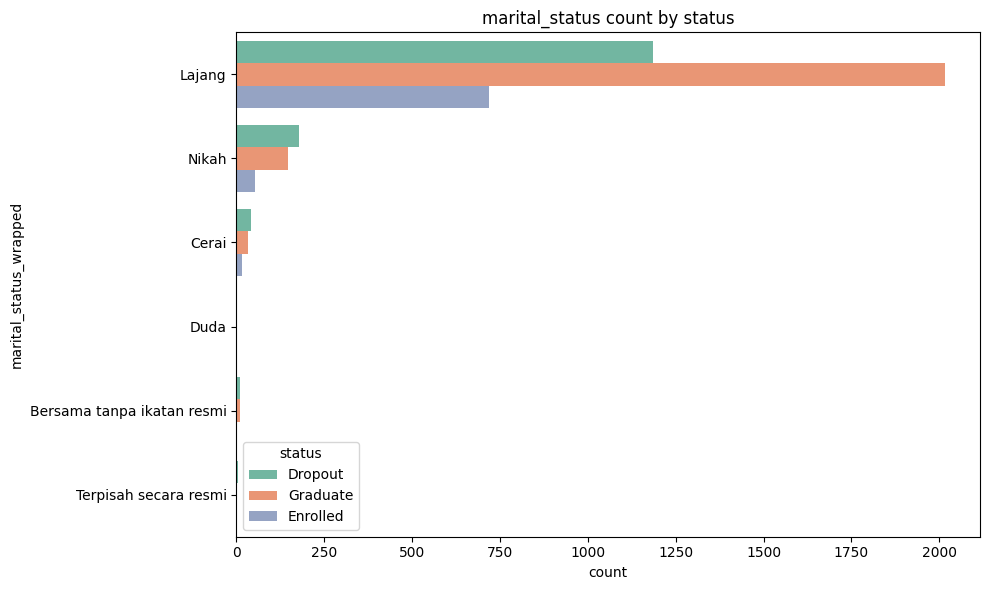

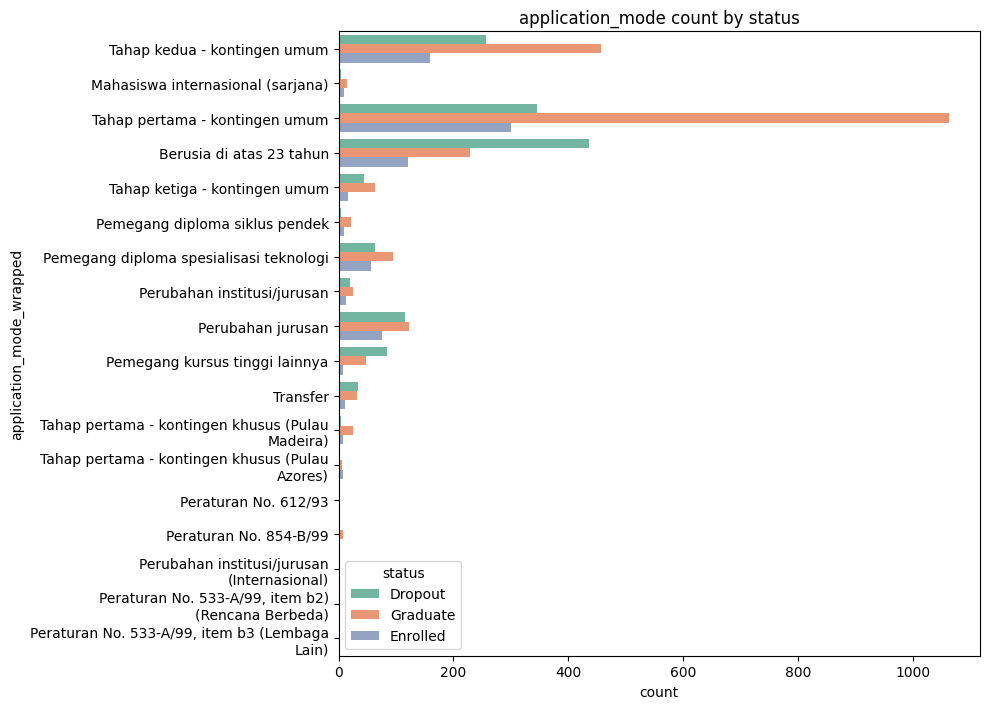

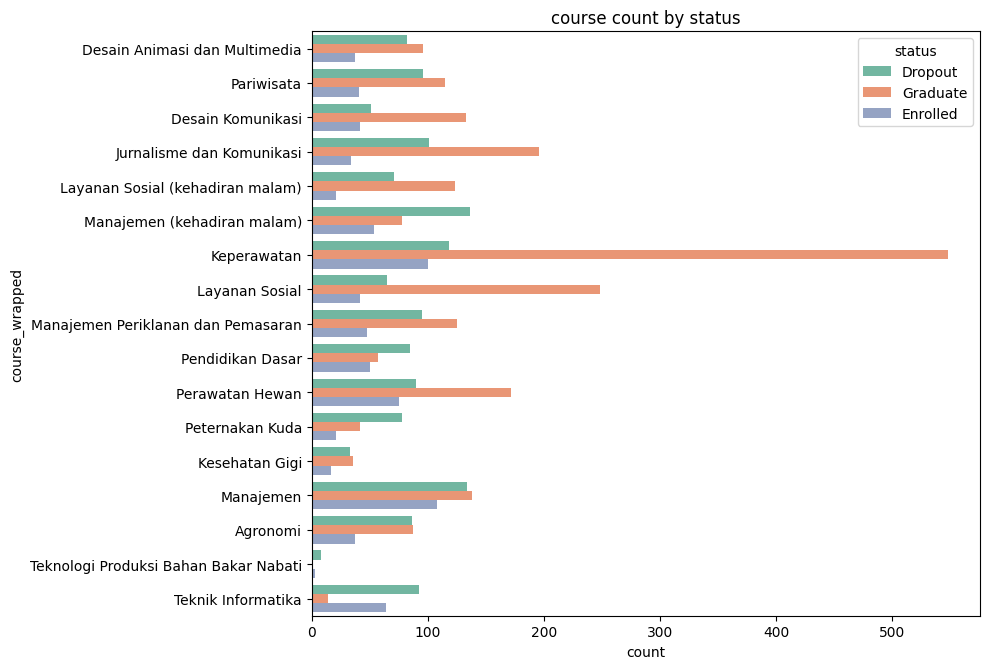

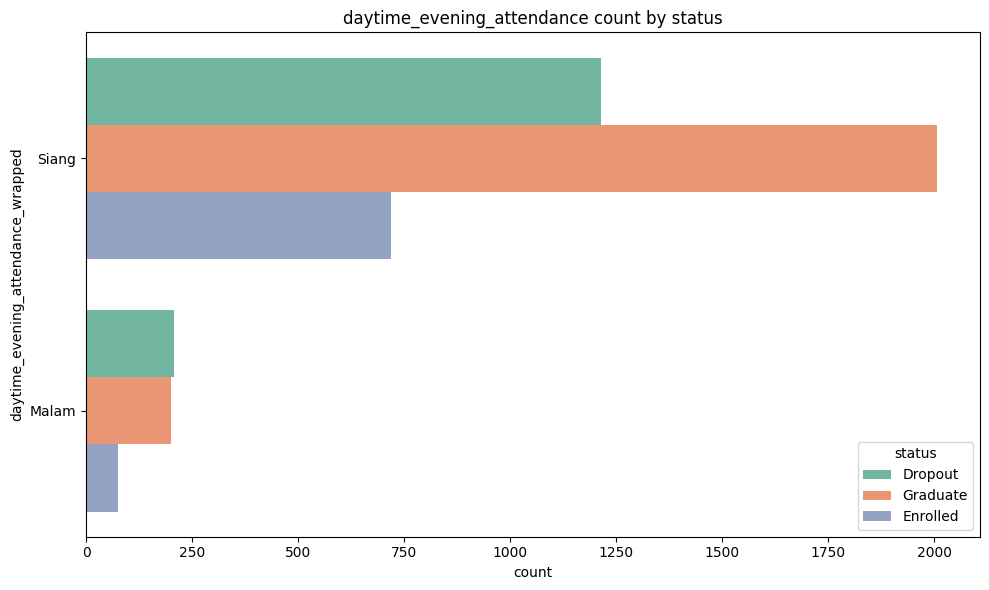

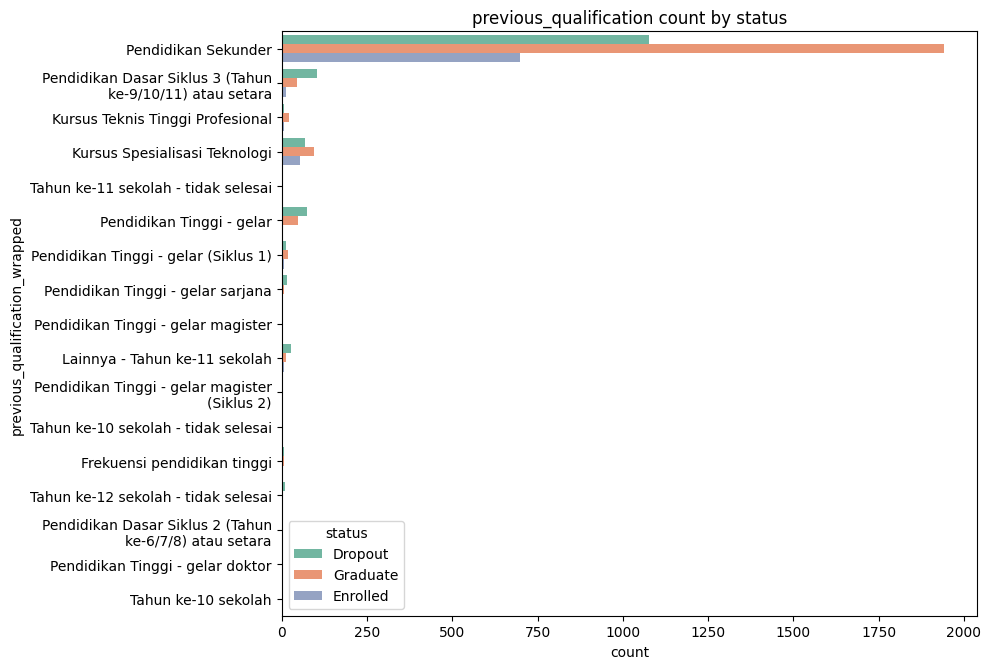

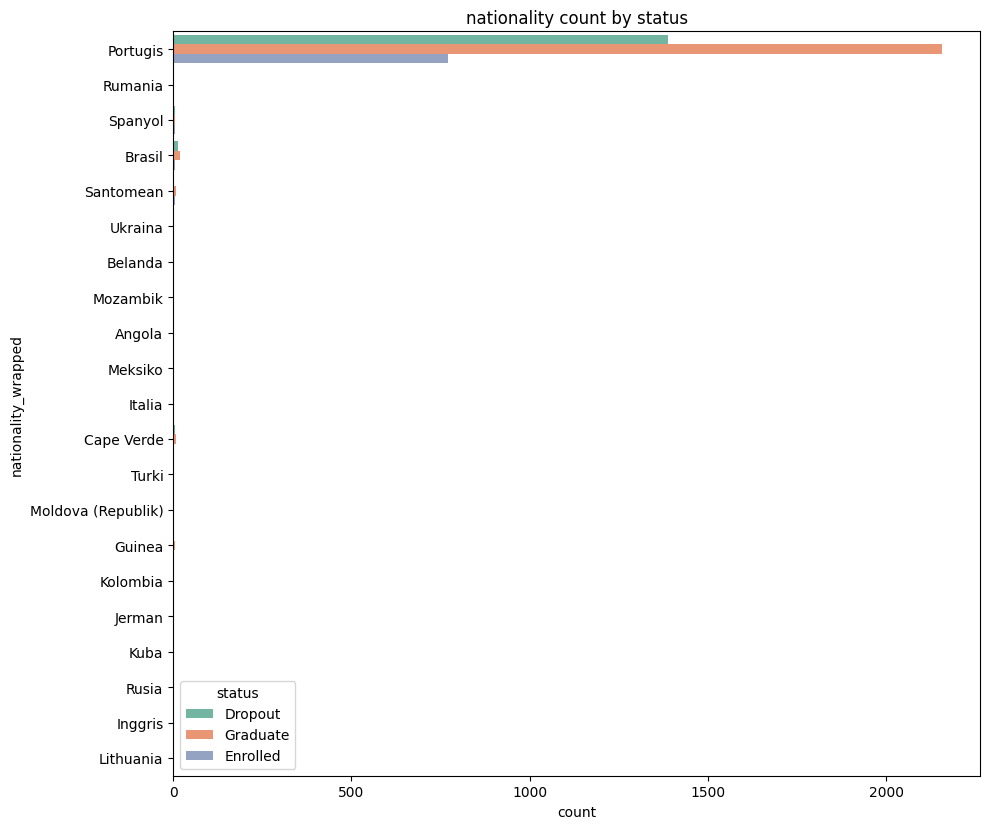

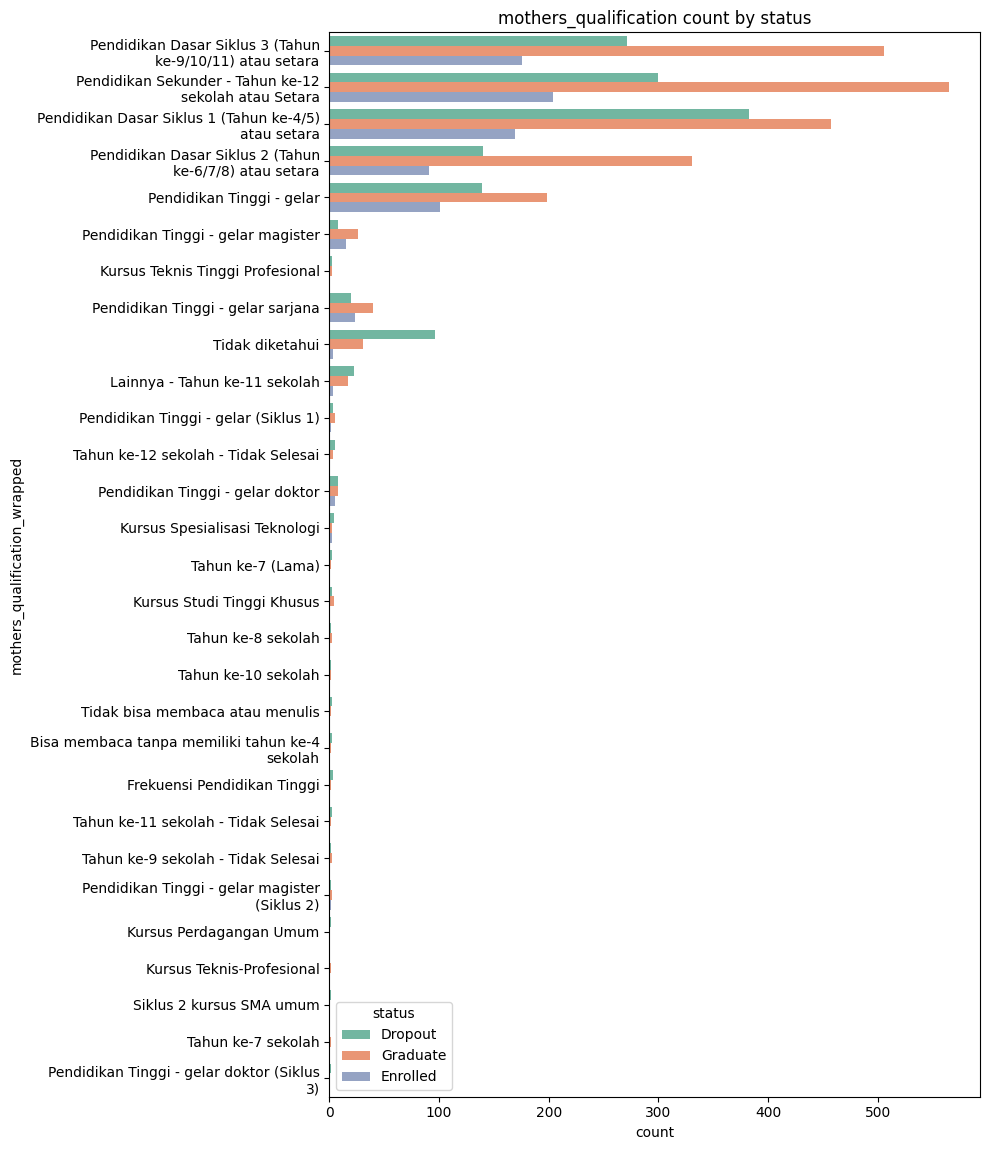

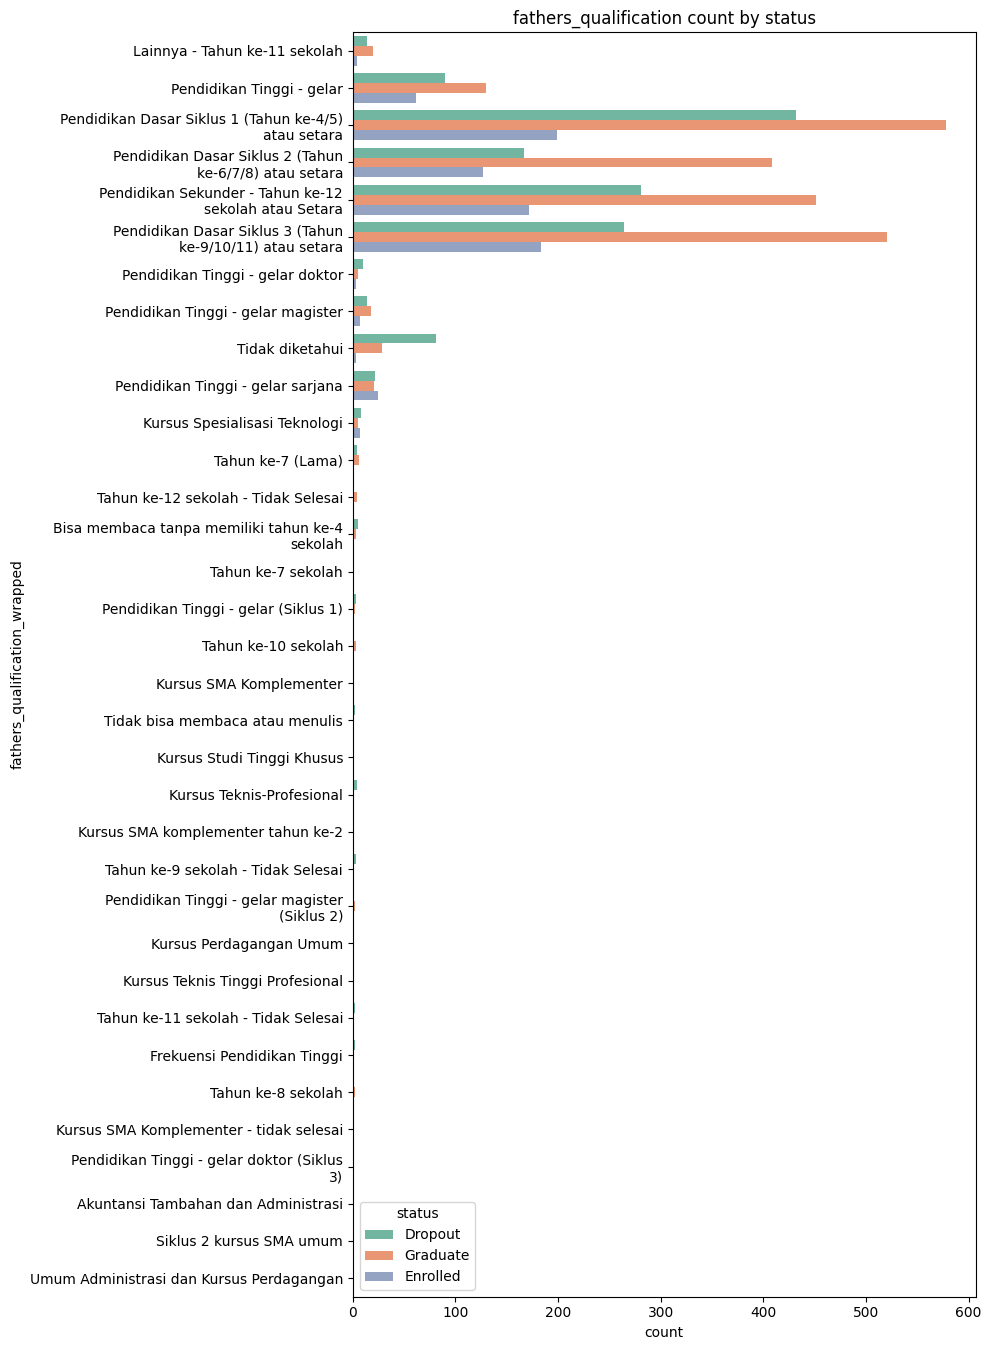

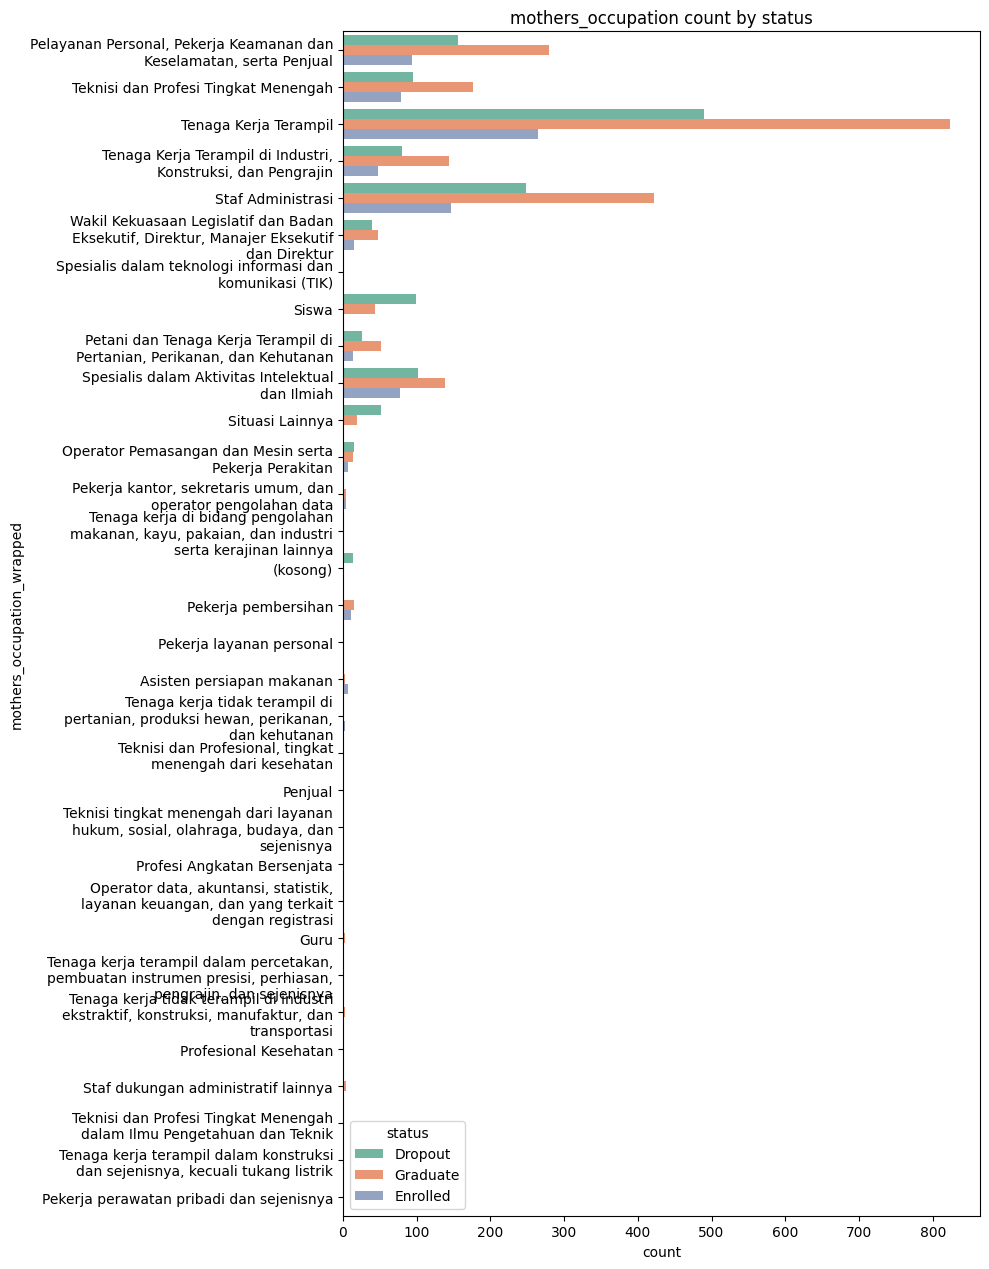

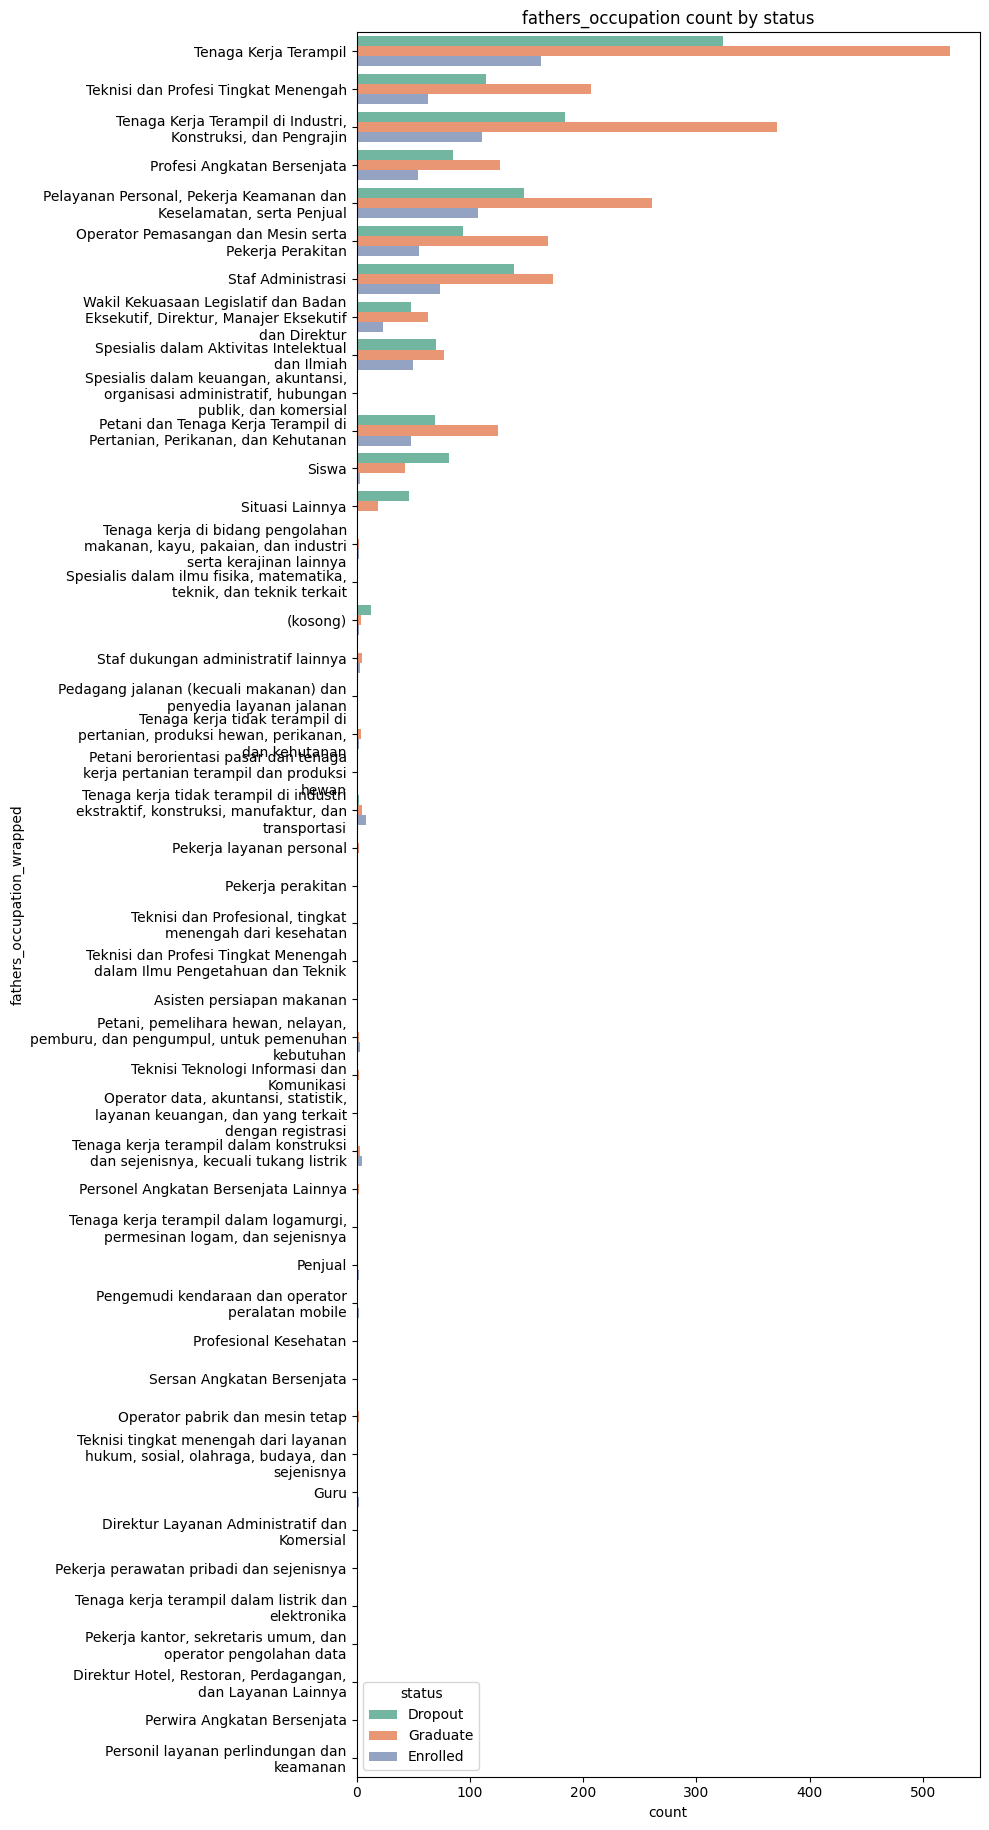

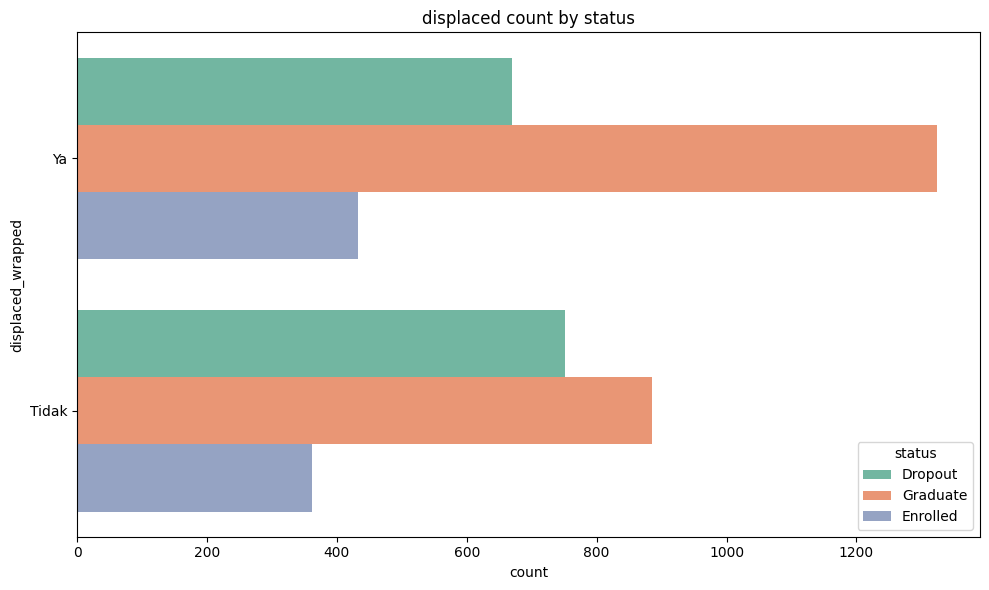

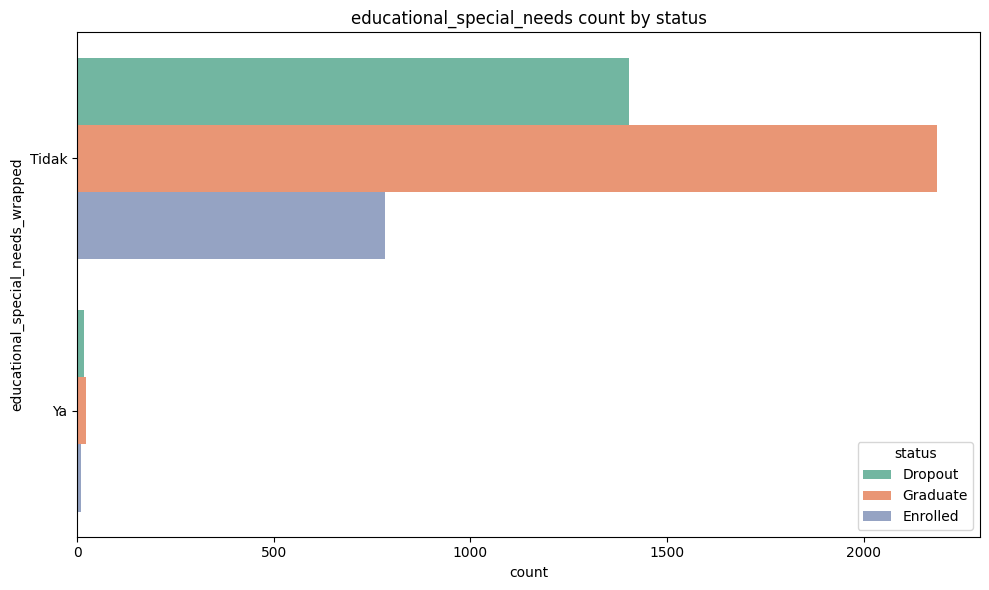

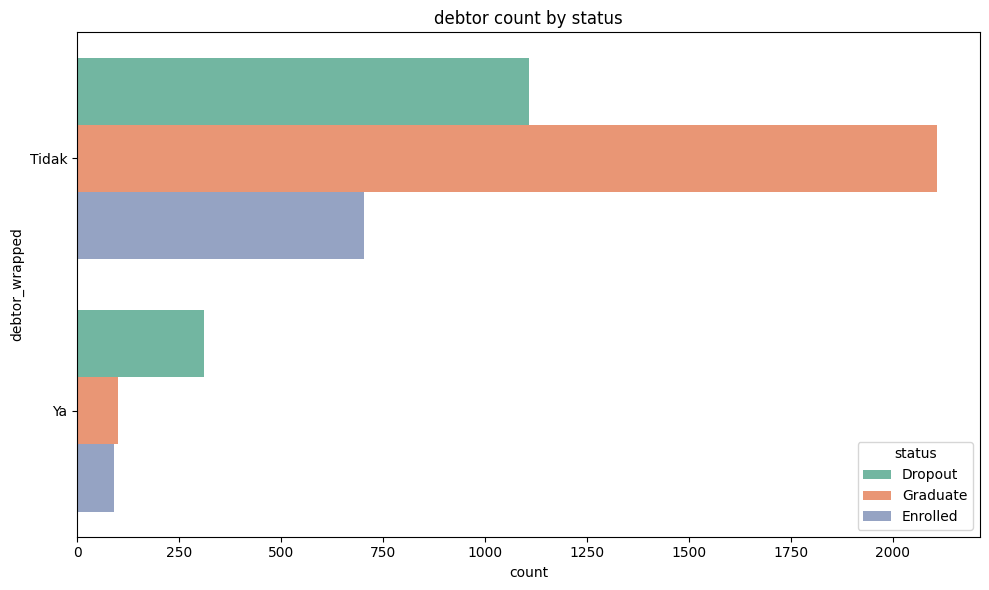

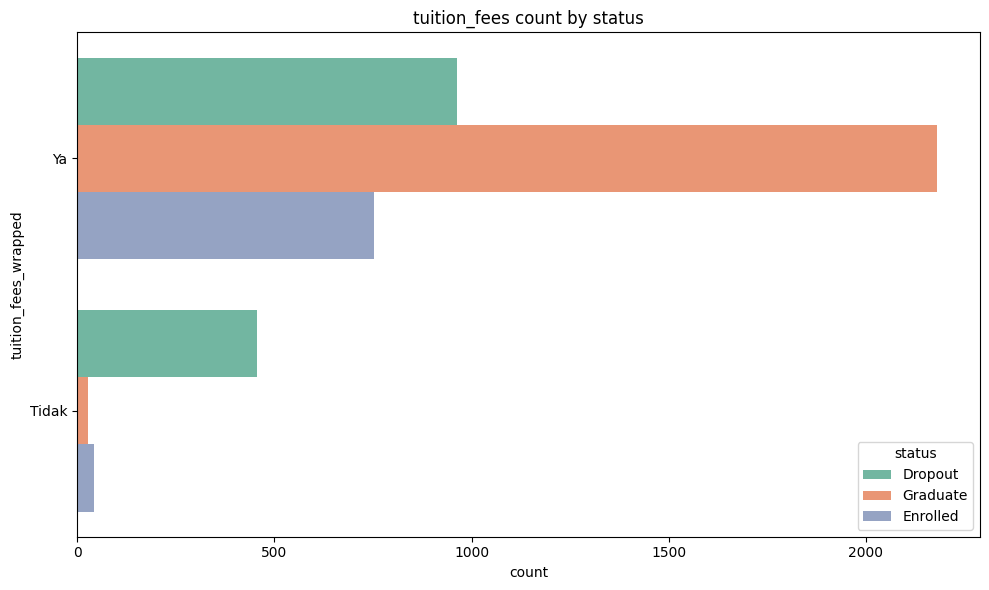

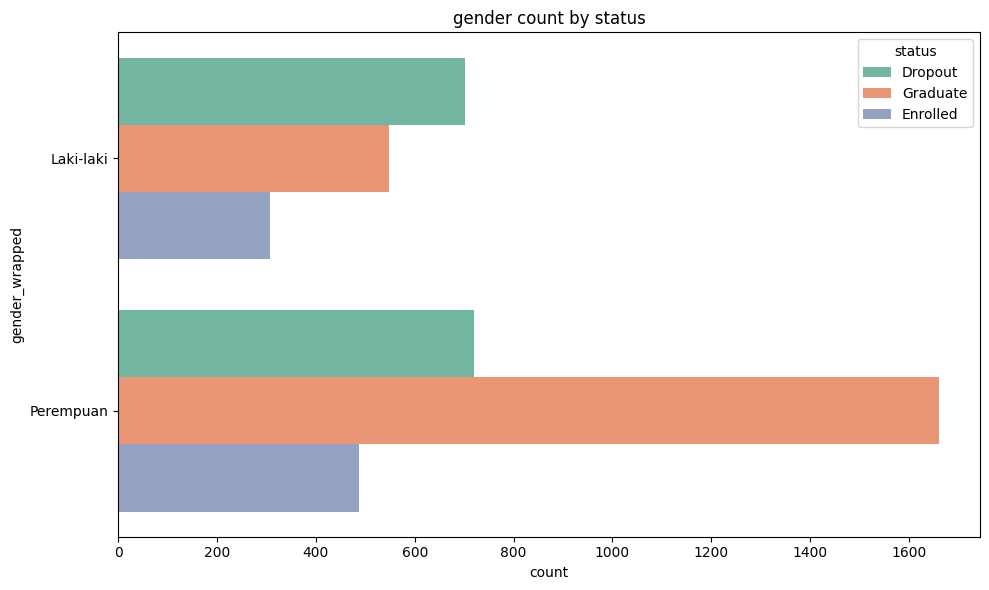

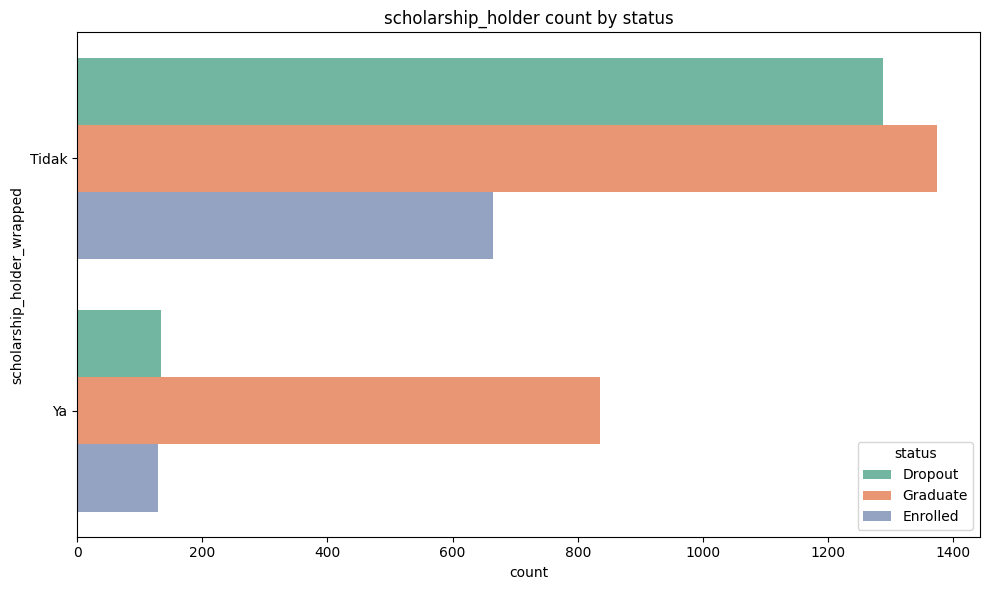

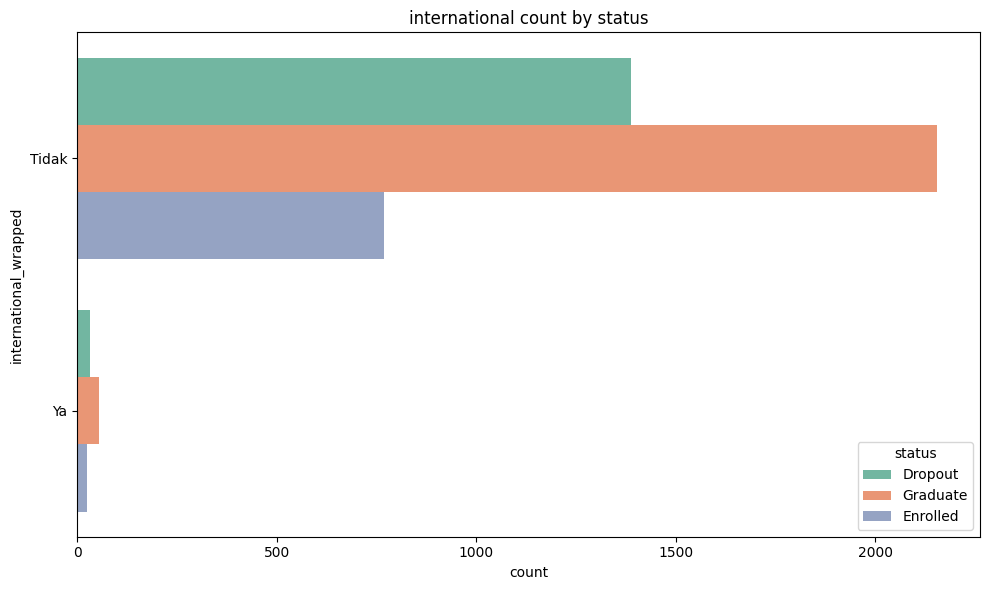

In [21]:
plot_all_categoricals(st_df, cat_features, hue='status')

In [22]:
def plot_all_numericals(st_df, features, segment_type=None):
    height = len(features) * 4
    
    fig, ax = plt.subplots(ncols=1, nrows=len(features), figsize=(10, height))
    if len(features) == 1:
        ax = [ax]
    
    for i, feature in enumerate(features):
        if segment_type:
            sns.boxplot(data=st_df, x=segment_type, y=feature, ax=ax[i], palette="Set2")
            ax[i].set_title(f"{feature} by {segment_type}")
        else:
            sns.boxplot(data=st_df, y=feature, ax=ax[i])
            ax[i].set_title(f"{feature}")
    plt.tight_layout()
    plt.show()



/var/folders/xl/0vxlkkrs2fg1z2tk2jw59v940000gn/T/ipykernel_1499/2775405871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=st_df, x=segment_type, y=feature, ax=ax[i], palette="Set2")
/var/folders/xl/0vxlkkrs2fg1z2tk2jw59v940000gn/T/ipykernel_1499/2775405871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=st_df, x=segment_type, y=feature, ax=ax[i], palette="Set2")
/var/folders/xl/0vxlkkrs2fg1z2tk2jw59v940000gn/T/ipykernel_1499/2775405871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=st_df, x=segment_type, y=fea

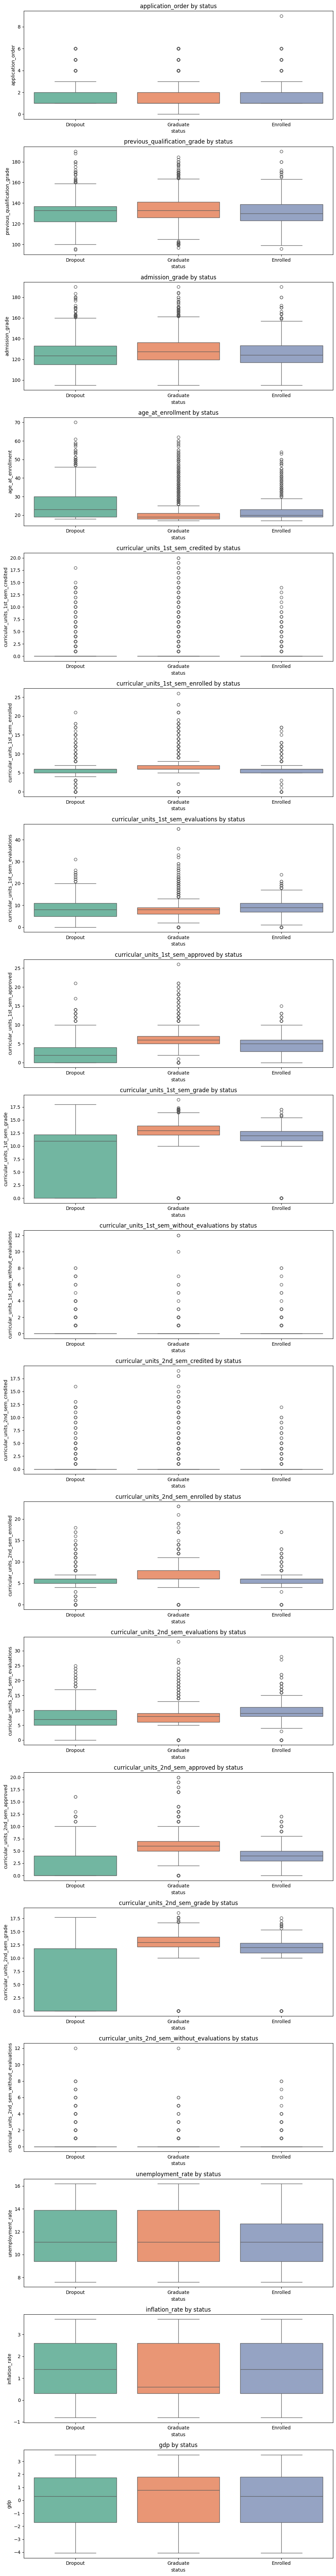

In [23]:
plot_all_numericals(st_df, num_features, segment_type="status")

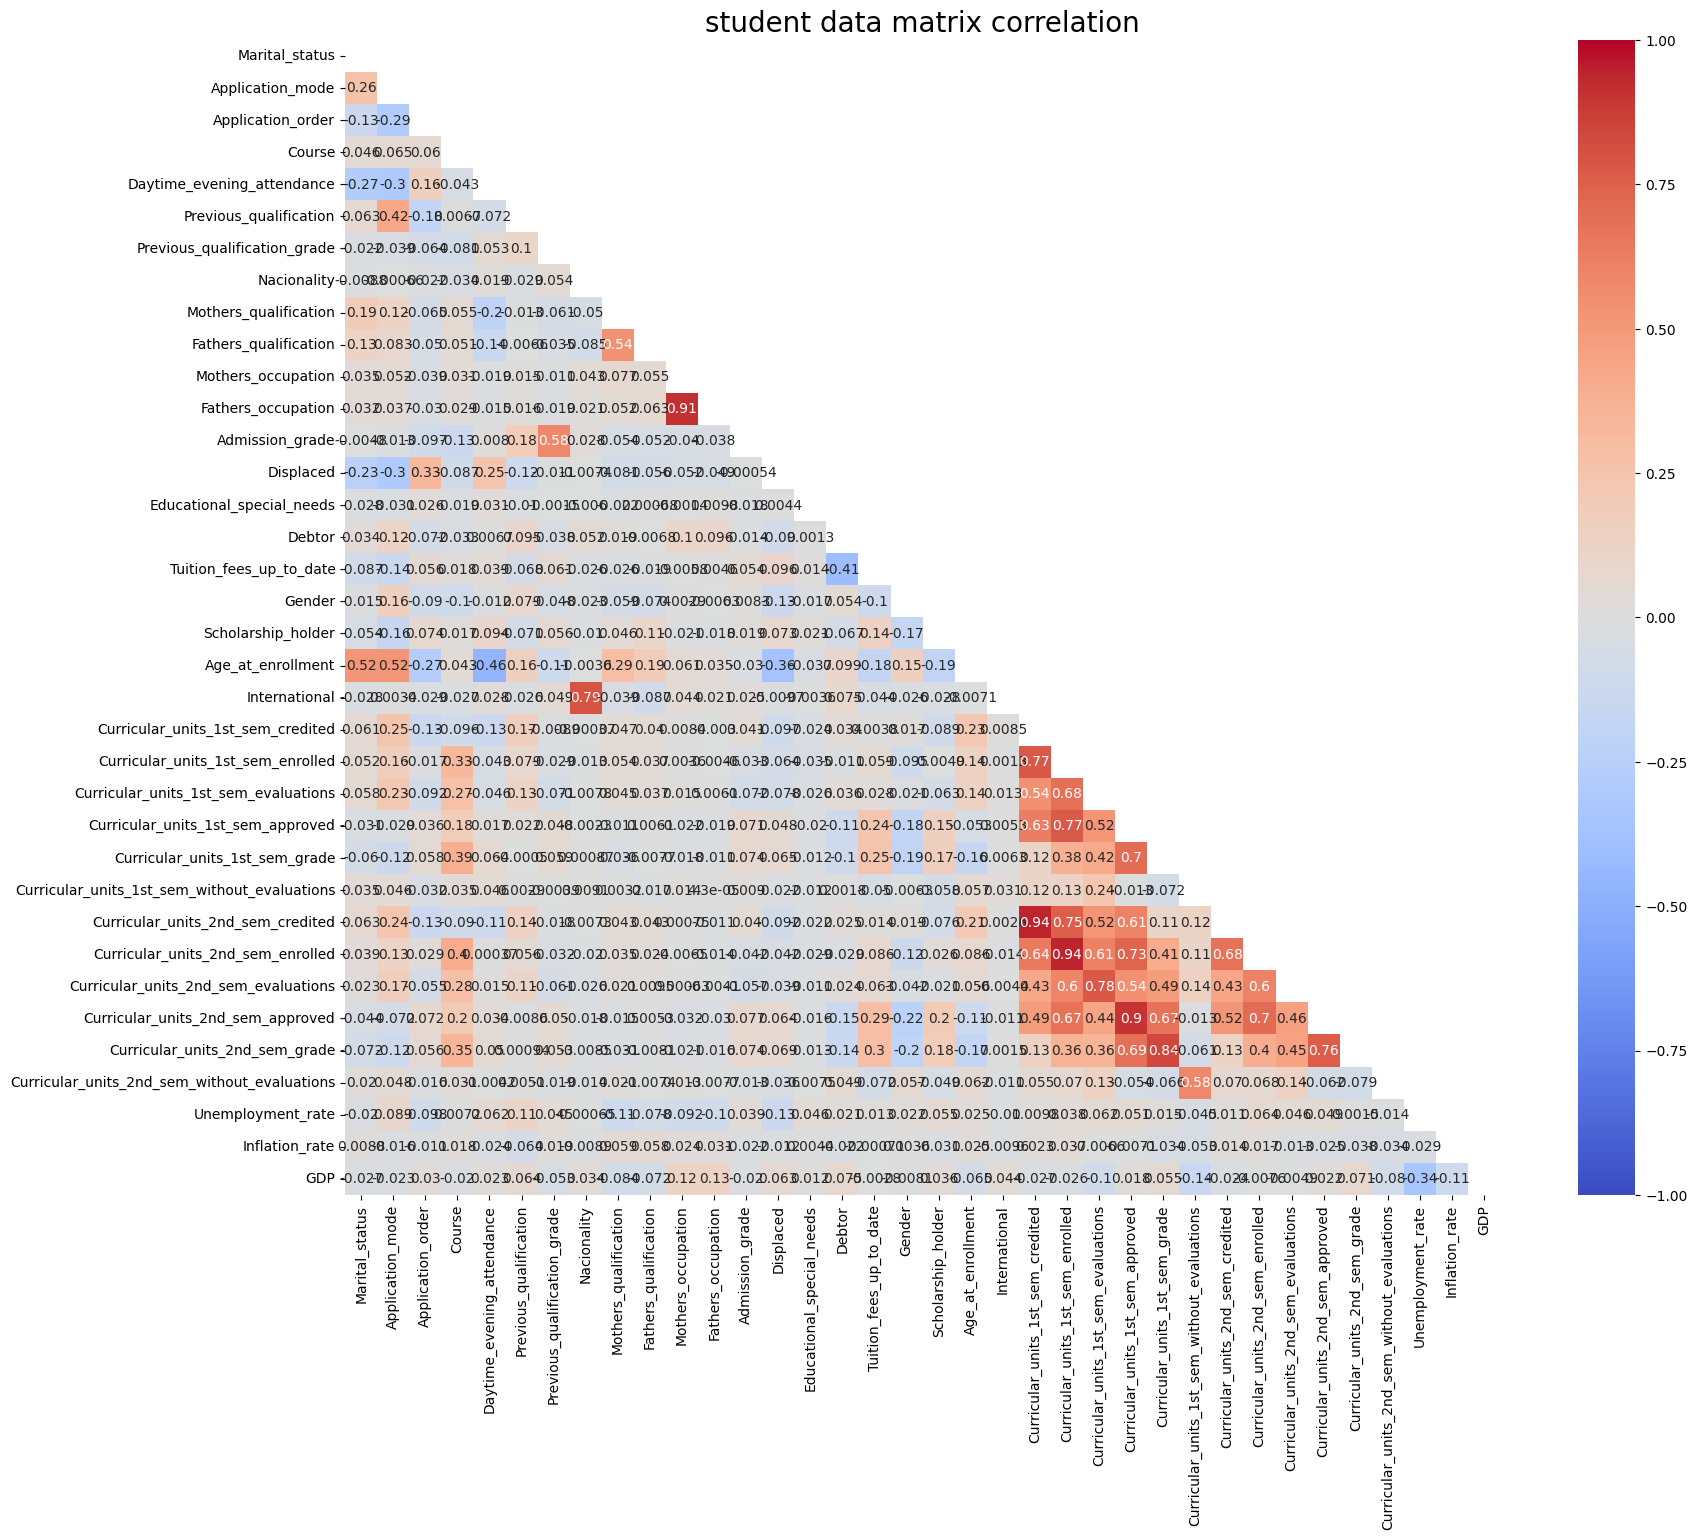

In [31]:
plt.figure(figsize=(20, 15))
correlation_matrix = st_df_raw.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    vmin=-1, vmax=1,
    annot=True,
    cmap="coolwarm",
    square=True
)
plt.title('student data matrix correlation', fontsize=20)
plt.show()


In [ ]:
df_new = st_df[st_df['status'] != 'Enrolled'].reset_index(drop=True)

,id,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nationality,mothers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,status
0,0,Lajang,Tahap kedua - kontingen umum,5,Desain Animasi dan Multimedia,Siang,Pendidikan Sekunder,122.0,Portugis,Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) a...,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,Lajang,Mahasiswa internasional (sarjana),1,Pariwisata,Siang,Pendidikan Sekunder,160.0,Portugis,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,Lajang,Tahap pertama - kontingen umum,5,Desain Komunikasi,Siang,Pendidikan Sekunder,122.0,Portugis,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,Lajang,Tahap kedua - kontingen umum,2,Jurnalisme dan Komunikasi,Siang,Pendidikan Sekunder,122.0,Portugis,Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) ata...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,Nikah,Berusia di atas 23 tahun,1,Layanan Sosial (kehadiran malam),Malam,Pendidikan Sekunder,100.0,Portugis,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [97]:
label_encoders = {}
categorical_cols = df_new.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le


X = df_new.drop(columns='status') 
y = df_new['status']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

## Modeling

In [99]:
models = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB()
}

In [100]:
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

In [101]:
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    preds = model.predict(X_test_scaled)
    
    metrics['Accuracy'].append(accuracy_score(y_test, preds))
    metrics['Precision'].append(precision_score(y_test, preds, zero_division=0))
    metrics['Recall'].append(recall_score(y_test, preds, zero_division=0))
    metrics['F1-Score'].append(f1_score(y_test, preds, zero_division=0))

In [102]:
results_df = pd.DataFrame(metrics, index=models.keys())
print(results_df)

     Accuracy  Precision    Recall  F1-Score
LR   0.907713   0.912088  0.938914  0.925307
SVM  0.909091   0.898305  0.959276  0.927790
DT   0.869146   0.895216  0.889140  0.892168
GB   0.909091   0.903433  0.952489  0.927313
RF   0.910468   0.896842  0.963801  0.929117
KNN  0.858127   0.850932  0.929864  0.888649
NB   0.834711   0.845494  0.891403  0.867841


In [103]:
rf_model = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
rf_model

RandomForestClassifier(class_weight='balanced')

In [104]:
y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
def evaluation_report(y_true, y_pred, title='Data', labels=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f'🧾 Evaluation Report on {title}')
    print('-' * 40)
    print(classification_report(y_true, y_pred, target_names=labels if labels else None))
    print(f'Accuracy : {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall   : {rec:.4f}')
    print(f'F1-Score : {f1:.4f}')
    print('-' * 40)

    # confusion Matrix
    plt.figure(figsize=(4.5, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels if labels else 'auto',
                yticklabels=labels if labels else 'auto')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label', fontsize=10)
    plt.ylabel('True Label', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()


In [ ]:
# train and predict with best model (Random Forest)
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


🧾 Evaluation Report on Training Data
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      2904
   macro avg       1.00      1.00      1.00      2904
weighted avg       1.00      1.00      1.00      2904

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000
----------------------------------------


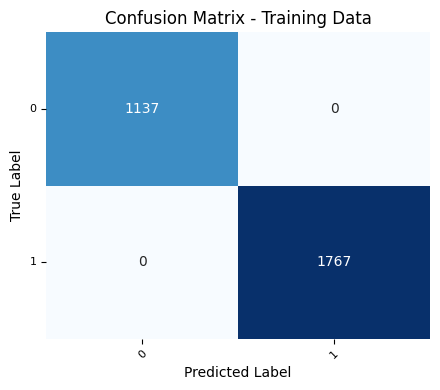

In [ ]:
# training data
evaluation_report(y_train, y_train_pred, title='Training Data')

🧾 Evaluation Report on Test Data
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726

Accuracy : 0.9091
Precision: 0.9118
Recall   : 0.9091
F1-Score : 0.9077
----------------------------------------


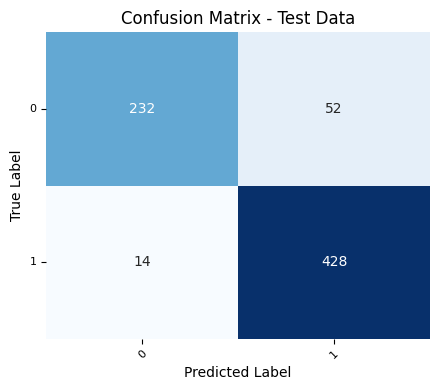

In [ ]:
#test data
evaluation_report(y_test, y_test_pred, title='Test Data')

In [109]:
param_grid = {
    'n_estimators': [100, 200],                   # Reduced from [100, 250, 500]
    'criterion': ['gini', 'entropy'],             # Keep both to compare split quality
    'max_depth': [10, 20],                        # Avoid overly shallow (3) or overly deep trees
    'min_samples_split': [2, 5],                  # Reasonable splits
    'min_samples_leaf': [1, 5],                   # Try stricter leaf size
    'max_features': ['sqrt'],                     # sqrt is usually best for classification RF
    'oob_score': [False],                         # Keep as False if not using OOB validation
    'class_weight': ['balanced']                  # Important for imbalanced classes
}


In [110]:
clf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
best_model = clf.fit(X_train, y_train)

print("Best Parameters:", best_model.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.875 total time=   0.8s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.905 total time=   0.8s
[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.908 total time=   0.8s
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, oob_score=False;, score=0.876 total time=   1.6s
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, oob_score=False;, score

In [111]:
y_train_best = best_model.predict(X_train)


In [112]:
y_test_best = best_model.predict(X_test)

🧾 Evaluation Report on Train Data
----------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1137
           1       0.94      1.00      0.97      1767

    accuracy                           0.96      2904
   macro avg       0.97      0.95      0.96      2904
weighted avg       0.96      0.96      0.96      2904

Accuracy : 0.9611
Precision: 0.9627
Recall   : 0.9611
F1-Score : 0.9607
----------------------------------------


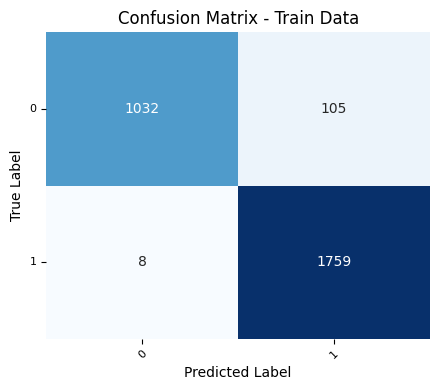

In [113]:
evaluation_report(y_train, y_train_best, title='Train Data')

🧾 Evaluation Report on Test Data
----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       284
           1       0.90      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726

Accuracy : 0.9132
Precision: 0.9159
Recall   : 0.9132
F1-Score : 0.9119
----------------------------------------


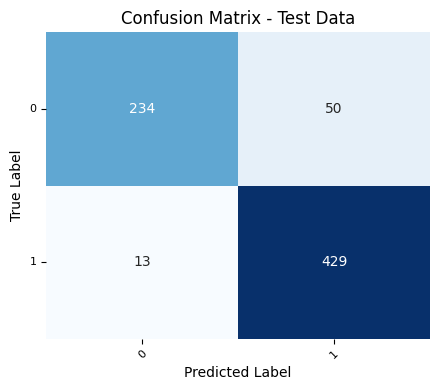

In [114]:
evaluation_report(y_test, y_test_best, title='Test Data')

In [116]:
joblib.dump(best_model, 'rf_model.joblib')

['rf_model.joblib']

### Conclusion

PEER: benerin tabel, ganti matrix, buat kesimpulan dan markdown file utk github disitu ada action item. 